<a href="https://colab.research.google.com/github/nicoyogis/TUBES-TKC/blob/main/histogram/hi_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [4]:
def plot_histogram(image, title, mask=None):
	# split the image into its respective channels, then initialize
	# the tuple of channel names along with our figure for plotting
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")

	# loop over the image channels
	for (chan, color) in zip(chans, colors):
		# create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

	plt.show()

In [5]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "/content/drive/MyDrive/dataset KC/AM196L.jpg"
}

In [6]:
# load the input image and convert it to grayscale
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
# compute a grayscale histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

(0.0, 256.0)

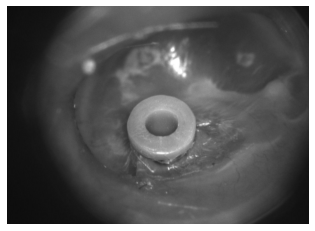

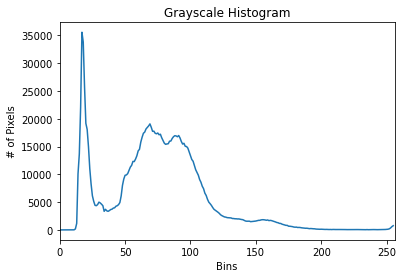

In [8]:
# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

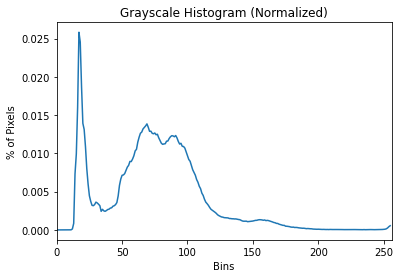

In [9]:
# normalize the histogram
hist /= hist.sum()

# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

Creating color histograms with OpenCV


In [10]:
# load the input image from disk
image = cv2.imread(args["image"])

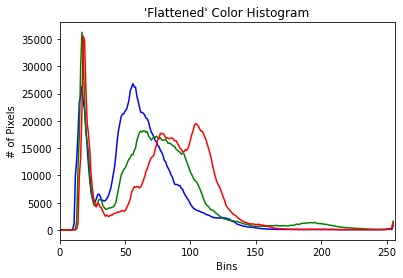

In [11]:
# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

2D histogram shape: (32, 32), with 1024 values


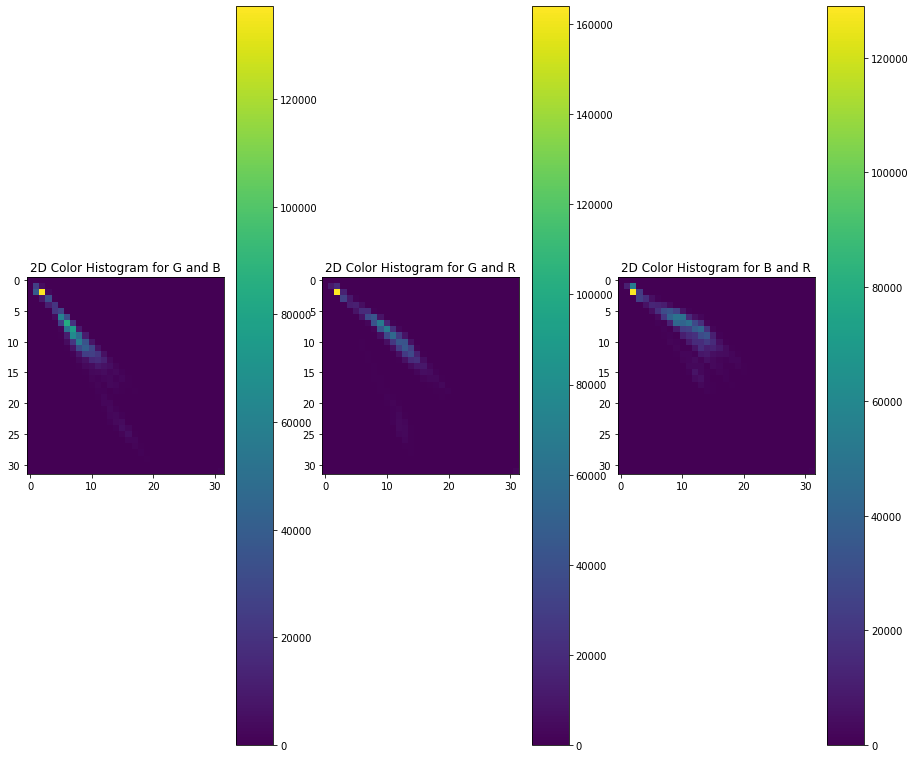

In [12]:
# create a new figure and then plot a 2D color histogram for the
# green and blue channels
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

In [13]:
# our 2D histogram could only take into account 2 out of the 3
# channels in the image so now let's build a 3D color histogram
# (utilizing all channels) with 8 bins in each direction -- we
# can't plot the 3D histogram, but the theory is exactly like
# that of a 2D histogram, so we'll just show the shape of the
# histogram
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


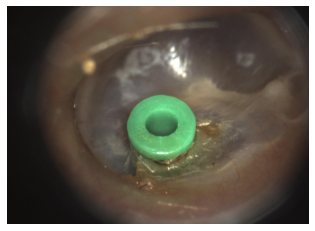

In [14]:
# display the original input image
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

# show our plots
plt.show()

Computing image histograms for masked regions with OpenCV


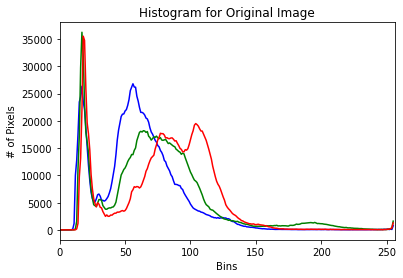

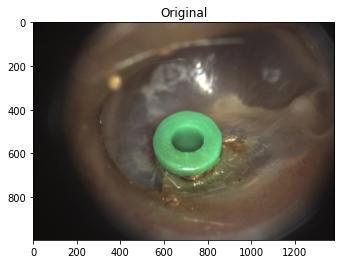

In [16]:
# load the beach image and plot a histogram for it
image = cv2.imread("/content/drive/MyDrive/dataset KC/AM196L.jpg")
plot_histogram(image, "Histogram for Original Image")
plt_imshow("Original", image)

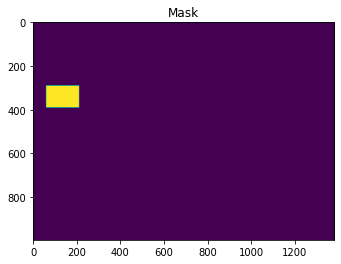

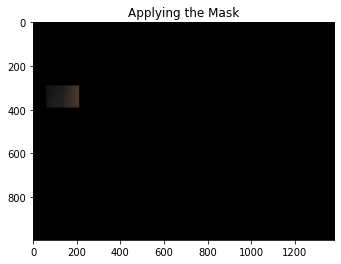

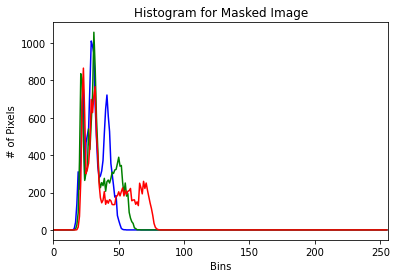

In [17]:
# construct a mask for our image; our mask will be *black* for regions
# we want to *ignore* and *white* for regions we want to *examine*
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
plt_imshow("Mask", mask)

# display the masked region
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Applying the Mask", masked)

# compute a histogram for our image, but we'll only include pixels in
# the masked region
plot_histogram(image, "Histogram for Masked Image", mask=mask)

# show our plots
plt.show()